<a href="https://colab.research.google.com/github/ehsanh123/machine-learning/blob/main/drug_abosbtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
#
from google.colab import drive
drive.mount('/content/drive')
# Caricamento dei dataset
patient_info = pd.read_csv("/content/drive/MyDrive/mechine learning/dataset1_covariates.csv")
does_time = pd.read_csv("/content/drive/MyDrive/mechine learning/dataset1_concentration.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(patient_info.describe())
print(f'shape = {patient_info.shape}')

                age        weight           SNP   hemoglobine      albumine  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      45.638900     83.149527      1.994100     12.483272      4.094657   
std       12.735719     20.787369      0.817516      2.088558      0.399548   
min        2.000000      1.238482      1.000000      2.795651      2.684174   
25%       37.000000     69.427271      1.000000     11.068377      3.827352   
50%       46.000000     83.326522      2.000000     12.480099      4.099618   
75%       54.000000     96.954366      3.000000     13.883062      4.362048   
max       93.000000    162.616134      3.000000     21.126323      5.593176   

       last_dose_time  mg_twice_daily_dose    blood_conc            CL  \
count         10000.0         10000.000000  10000.000000  10000.000000   
mean             52.0             3.446695      7.605269     89.854616   
std               0.0             1.785337      3.079804     35.90

In [ ]:

#data2_covariates =   # Standardizzazione delle covariate
import plotly.express as px
import plotly.io as pio

#fig, ax = plt.subplots(1,1,figsize=(10, 6)) # Corrected: fig, ax = ... instead of ax, fig = ...
def draw_corlation(d_set,title1 = "Correlations Between Data",numners= False):
  correlation = d_set.corr(numeric_only=True)
  if numners:
    fig = px.imshow(
      correlation,
      template = 'plotly_dark',
      text_auto = "0.01f",
      aspect=1,
      color_continuous_scale="orrd",
      title= title1
    )
  else:
    fig = px.imshow(
      correlation,
      template = 'plotly_dark',
      aspect=1,
      color_continuous_scale="orrd",
      title= title1
    )

  fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
  )
#iplot(fig)
  fig.show()

draw_corlation(patient_info,'Correlations Between Data',True )

In [ ]:
d2 = patient_info.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in d2.columns:
    if pd.api.types.is_numeric_dtype(d2[column]):
      d2[column] = scaler.fit_transform(d2[[column]])
      # a=1
    else:
      d2[column] = encoder.fit_transform(d2[column])
d2.drop('last_dose_time',axis=1,inplace=True)
# draw_corlation(d2,'Correlations Between Data',False)

##powers coraltion

In [ ]:
draw_corlation(d2,'Correlations Between Data',True)
for pow in range(1,3):
  d2_ = d2.copy()
  for column in d2_.columns:
    if column != 'last_dose_time':
      if d2_[column].dtype=='float64':
        d2_[column] = d2_[column] ** pow
  d2_['t1'] = does_time['t1']

  draw_corlation(d2_,f'Correrlation Between Power {pow}',True)

In [ ]:
draw_corlation(d2,'Correlations Between Data',True)
for pow in range(1,3):
  d2_ = d2.copy()
  for column in d2_.columns:
    if column != 'last_dose_time':
      if d2_[column].dtype=='float64':
        d2_[column] = d2_[column] ** (-1*pow)
  d2_['t1'] = does_time['t1']

  draw_corlation(d2_,f'Correrlation Between Power {-1*pow}',True)

##E to power coralations

In [ ]:
draw_corlation(d2,'Correlations Between Data',True)
for pow in range(1,3):
  d2_ = d2.copy()
  for column in d2_.columns:
    if column != 'last_dose_time':
      if d2_[column].dtype=='float64':
        # d2_[column] = d2_[column] ** pow
        d2_[column] = np.exp(d2_[column]*pow)
  d2_['t1'] = does_time['t1']

  draw_corlation(d2_,f'Correrlation Between E ^ {pow}',True)


In [ ]:
draw_corlation(d2,'Correlations Between Data',True)
for pow in range(1,3):
  d2_ = d2.copy()
  for column in d2_.columns:
    if column != 'last_dose_time':
      if d2_[column].dtype=='float64':
        # d2_[column] = d2_[column] ** pow
        d2_[column] = np.exp(d2_[column]*(-1*pow))
  d2_['t1'] = does_time['t1']

  draw_corlation(d2_,f'Correrlation Between E ^ {(-1*pow)}',True)


##log CORALATIONS

In [ ]:
draw_corlation(d2,'Correlations Between Data',True)
for pow in range(1,3):
  d2_ = d2.copy()
  for column in d2_.columns:
    if column != 'last_dose_time':
      if d2_[column].dtype=='float64':
        # d2_[column] = d2_[column] ** pow
        d2_[column] = np.log((d2_[column]*pow).clip(lower=1e-30))
  d2_['t1'] = does_time['t1']

  draw_corlation(d2_,f'Correrlation Between ln *{pow}',True)


In [ ]:
draw_corlation(d2,'Correlations Between Data',True)
# for pow in range(1,3):
#   d2_ = d2.copy()
#   for column in d2_.columns:
#     if column != 'last_dose_time':
#       if d2_[column].dtype=='float64':
#         # d2_[column] = d2_[column] ** pow
#         d2_[column] = np.log((d2_[column]*-1*pow).clip(lower=1e-30))
#   d2_['t1'] = does_time['t1']

#   draw_corlation(d2_,f'Correrlation Between ln *{-1*pow}',True)


#HISTOGRAM

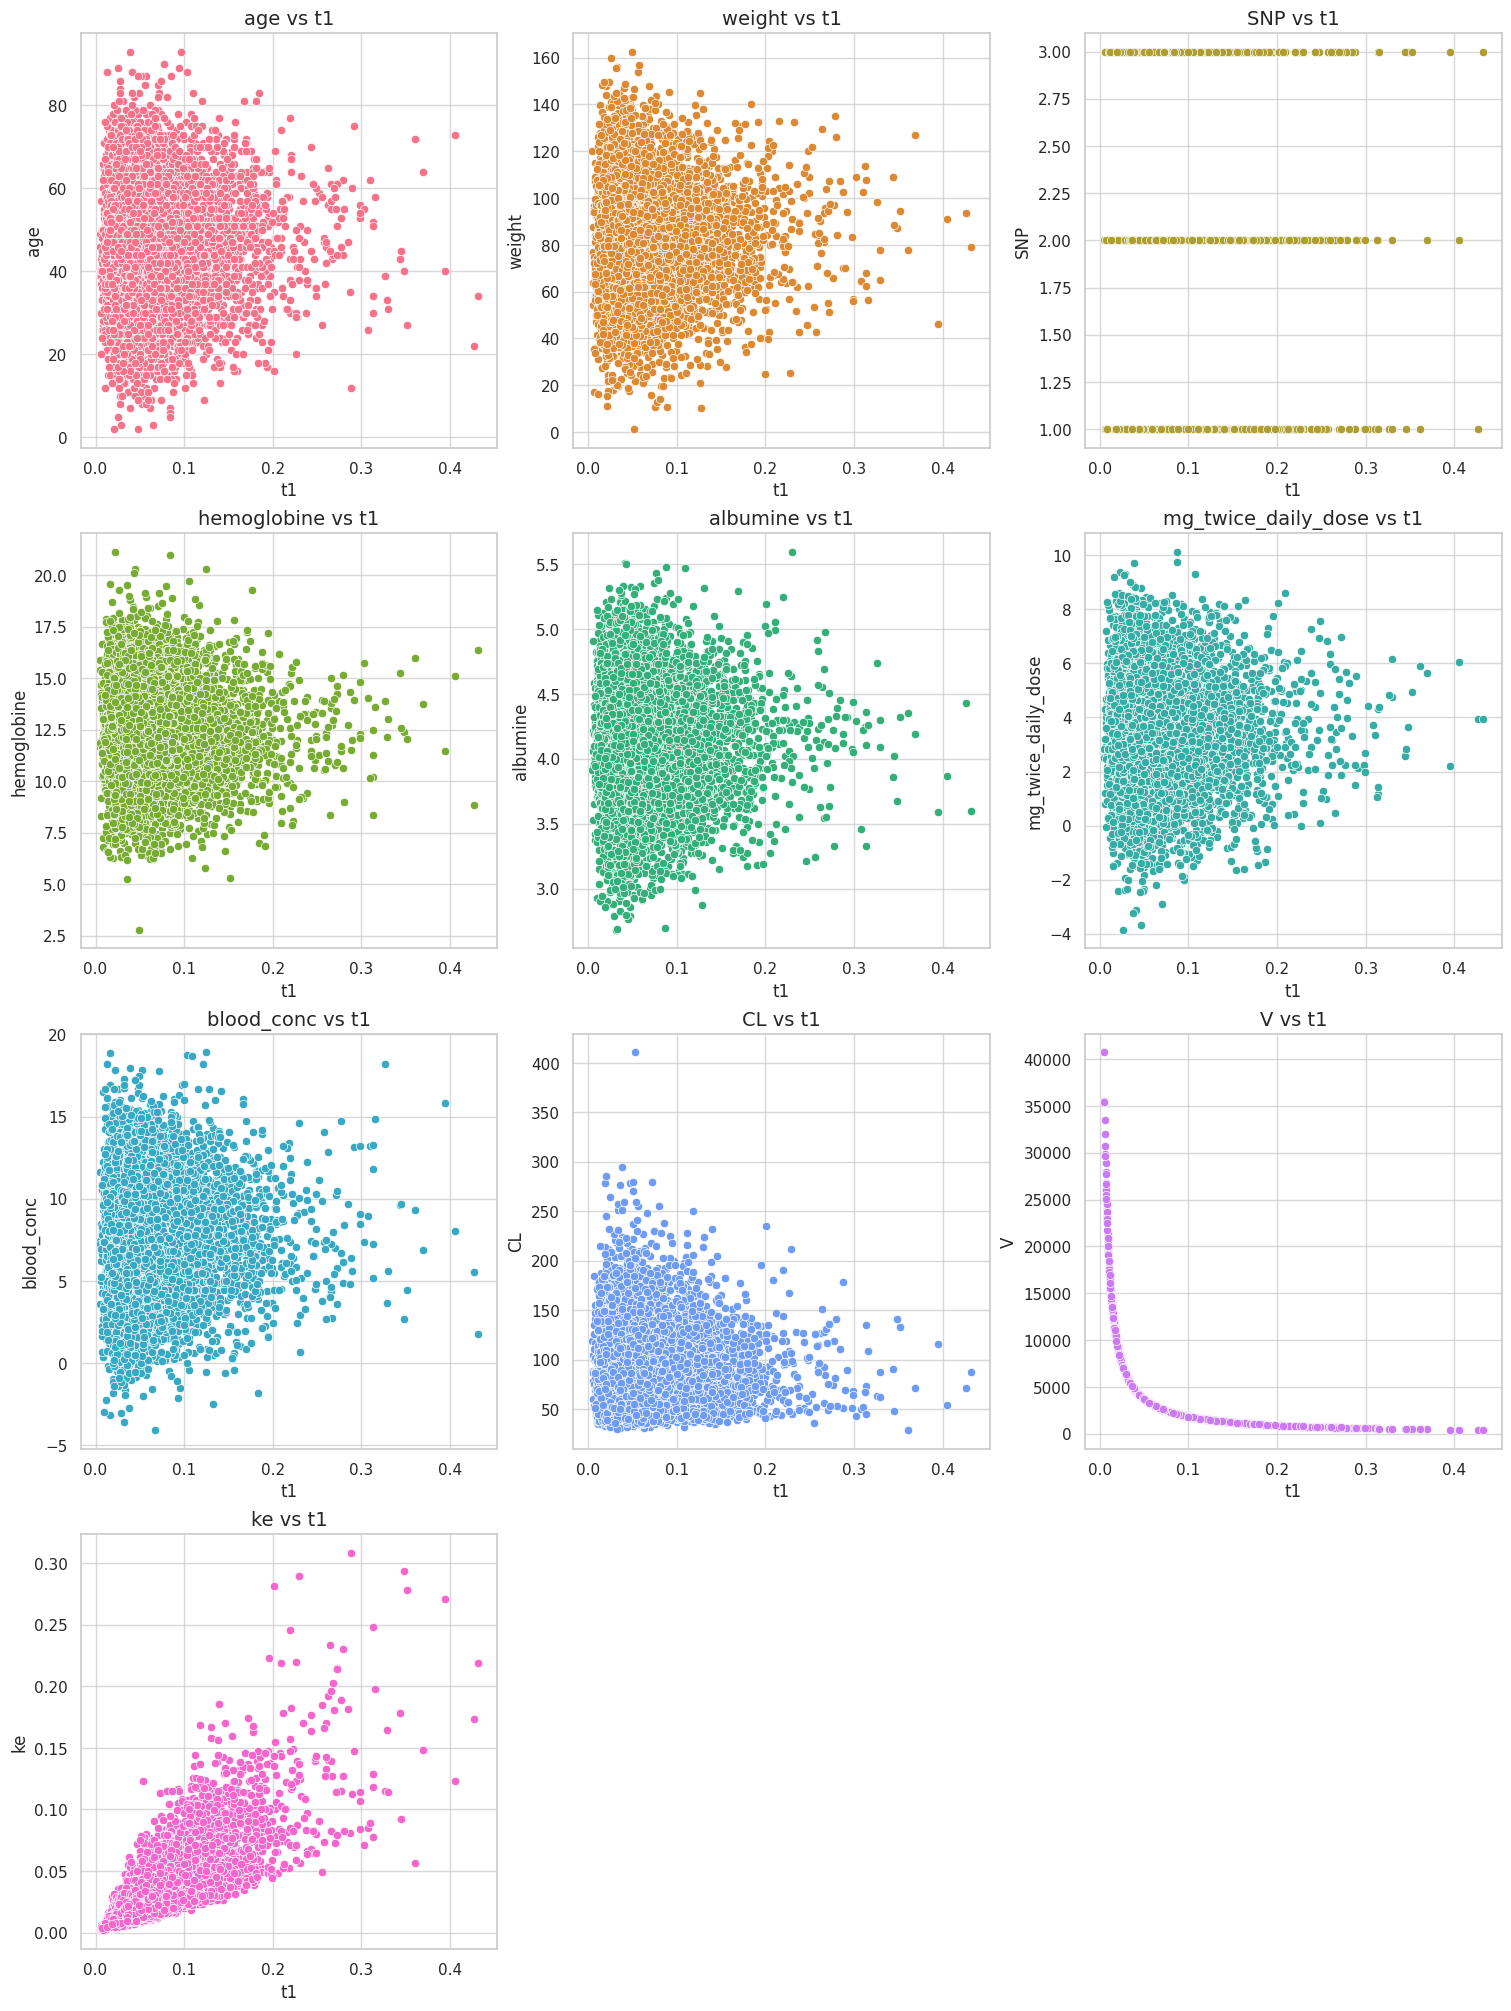

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded
# d2_ = pd.read_csv("your_dataset.csv")

# List of columns for scatter plots
columns = ['age', 'sex', 'race', 'weight', 'SNP', 'hemoglobine', 'albumine',
           'mg_twice_daily_dose', 'blood_conc', 'CL', 'V', 'ke', 't1']

# Set up the visual style
sns.set_theme(style="whitegrid")
d2_ = patient_info
d2_['t1'] = does_time['t1']
# Filter numeric columns and exclude 't1' from x-axis
numeric_columns = [col for col in columns if pd.api.types.is_numeric_dtype(d2_[col]) and col != 't1']

# Set up the figure for subplots
num_cols = len(numeric_columns)
cols = 3  # Number of columns in the grid
rows = (num_cols + cols - 1) // cols  # Compute the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)
axes = axes.flatten()

# Colors for the scatter plots
colors = sns.color_palette("husl", len(numeric_columns))

# Plot each numeric column against t1
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=d2_['t1'], y=d2_[col], color=colors[i], ax=axes[i])
    axes[i].set_title(f"{col} vs t1", fontsize=14)
    axes[i].set_xlabel("t1", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(alpha=0.75)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Display the plot
plt.show()


#modeling

In [ ]:
def display1(y_test1, y_pred1):
  # Calcolo delle metriche di performance
  mse = mean_squared_error(y_test1, y_pred1)
  r2 = r2_score(y_test1, y_pred1)
  #

  print(f"MSE (Mean Squared Error): {mse}")
  print(f"R² Score: {r2}")
  #mpl.style.use('classic')
  plt.scatter(y_test1, y_pred1)
  plt.title('model accuracy')
  plt.xlabel("True Values")
  plt.ylabel("Predictions")
  plt.title("RandomForestRegressor Predictions")
  plt.show()

In [ ]:
columns = ['age',
           'sex', 'race', 'weight',
           'SNP', 'hemoglobine', 'albumine',
          'last_dose_time', 'mg_twice_daily_dose',
           'blood_conc'#,
           #'CL', 'V', 'ke',
       #'t1'
       ]

columns = [#'age',
           #'sex', 'race', 'weight',
           'SNP', #'hemoglobine', 'albumine',
       #'last_dose_time',
           #'mg_twice_daily_dose', 'blood_conc', #'CL',
           #'V',
           'ke',
       ]

X2 = d2[columns]
y2 = d2['CL']  # Concentrazioni da t0 a t48 (t0, t1, ..., t48)
# Divisione tra dati di addestramento e dati di test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


MSE (Mean Squared Error): 0.5298589108245252
R² Score: 0.44562264478354063


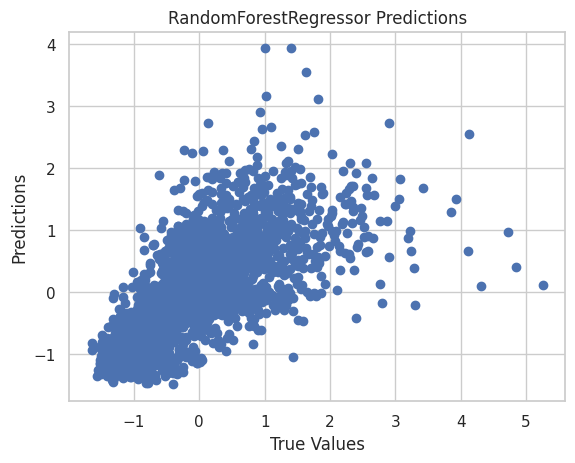

In [ ]:
# Creazione e addestramento del modello Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
history = model.fit(X_train, y_train)
# Predizione sui dati di test
y_pred = model.predict(X_test)

display1(y_test,y_pred)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
MSE (Mean Squared Error): 0.3724821255454028
R² Score: 0.610281810106896


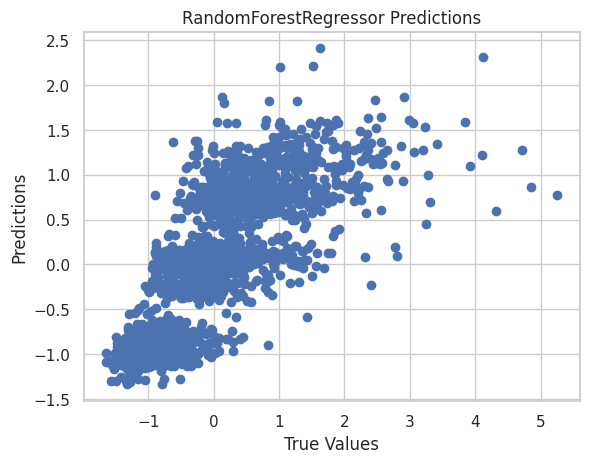

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

display1(y_test,y_pred)

In [ ]:
def find_best_feature(model1,test_columns,selected_columns,dataset=d2):
  results = {}  # To store the MSE for each column
  c1 = selected_columns.copy()
  c1 = [x for x in c1 if x not in test_columns]

  for column in c1:
    c2 = test_columns.copy()
    c2.append(column) # Append to the 'colum' list instead
    # print(c1)
    # col2 = colum.append(column)
    # Use the column as the sole predictor
    X2 = dataset[c2]#[[col2]]  # Double brackets to keep X2 as a DataFrame

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=model1.n_estimators, random_state=model1.random_state)
    # Train Random Forest model
    model.fit(X_train, y_train)

    # Predict and calculate MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[column] = mse

  # Display the results
  # for column, mse in sorted(results.items(), key=lambda x: x[1]):  # Sort by MSE
  #   print(f"Column: {column}, MSE: {mse}")
  sorted_results = sorted(results.items(), key=lambda x: x[1])

# Extract columns and MSE values for plotting
  columns = [item[0] for item in sorted_results]
  mse_values = [item[1] for item in sorted_results]

  # Create the bar plot
  plt.figure(figsize=(10, 5))
  plt.barh(columns, mse_values, color='skyblue')
  plt.xlabel(f'fixed columns {test_columns}')
  plt.title(f'MSE for Each Column for {model1.__class__.__name__}')

  # Display the plot
  plt.show()
  return #results

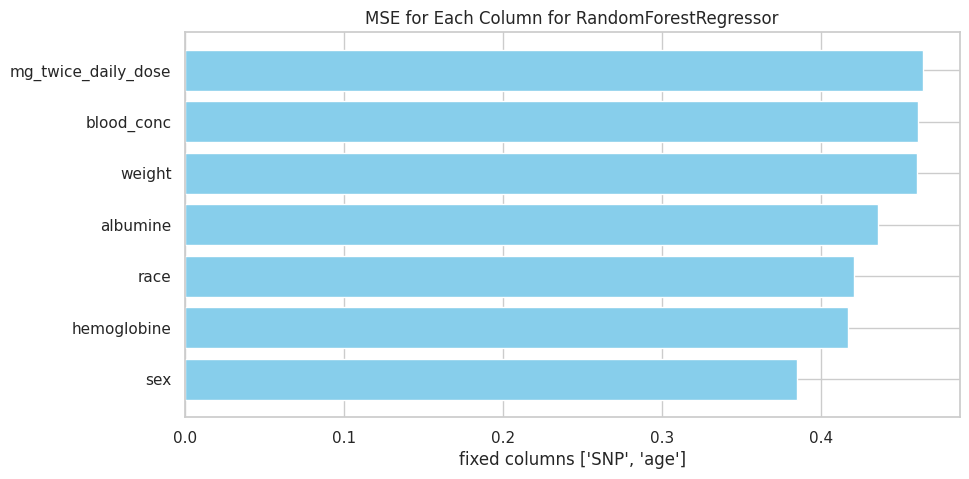

In [ ]:
# List of columns to evaluate
columns = ['age',
           'sex', 'race', 'weight',
           'SNP', 'hemoglobine', 'albumine',
           'mg_twice_daily_dose', 'blood_conc' #'CL', #  'V', #  'ke',
       ]

# Extract target variable
y2 = d2['CL']
model = RandomForestRegressor(n_estimators=100, random_state=42)

colum = ['SNP','age']
find_best_feature(model,colum,columns)

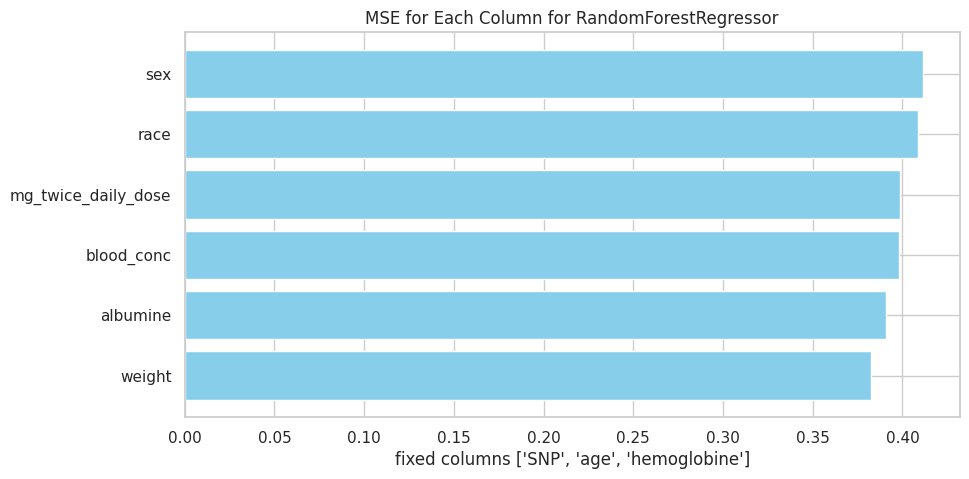

In [ ]:
colum = ['SNP','age','hemoglobine']
find_best_feature(model,colum,columns)

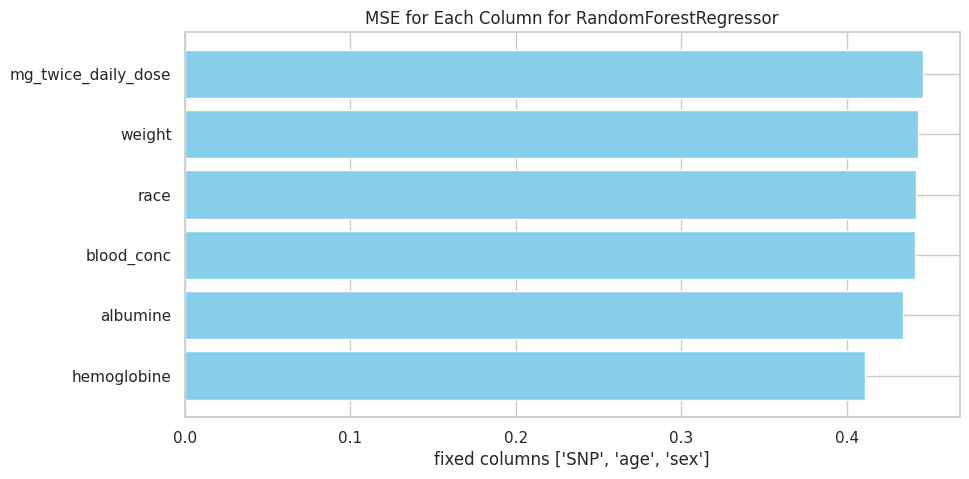

In [ ]:
colum = ['SNP','age','sex']
find_best_feature(model,colum,columns)

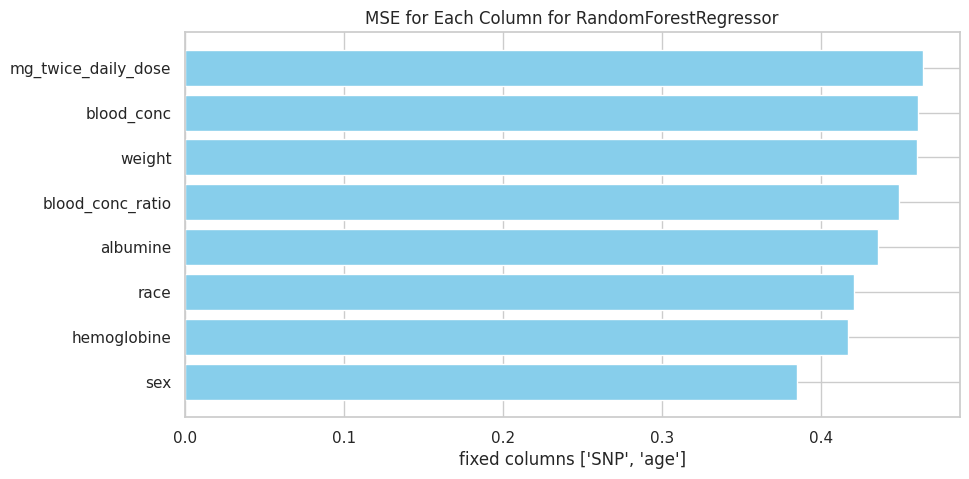

In [ ]:
d3 = d2.copy()

# d3['age_weight'] = d3['age'] * d3['weight']
# d3['blood_conc_ratio'] = d3['blood_conc'] / d3['weight']
# d3['log_blood_conc'] = np.log1p(d3['blood_conc'])

# d3.drop('age',axis=1,inplace=True)
# d3.drop('weight',axis=1,inplace=True)
# d3.drop('blood_conc',axis=1,inplace=True)
d3.columns
# X2 = d3[columns]
columns = ['sex', 'race', 'SNP', 'hemoglobine', 'albumine', 'mg_twice_daily_dose',
       #'CL', 'V', 'ke', 't1',
          #  'age_weight',
           'blood_conc_ratio','age','weight',
       'blood_conc']
colum = ['SNP','age']
find_best_feature(model,colum,columns,d3)

MSE (Mean Squared Error): 0.29897089741994964
R² Score: 0.6871946625556468


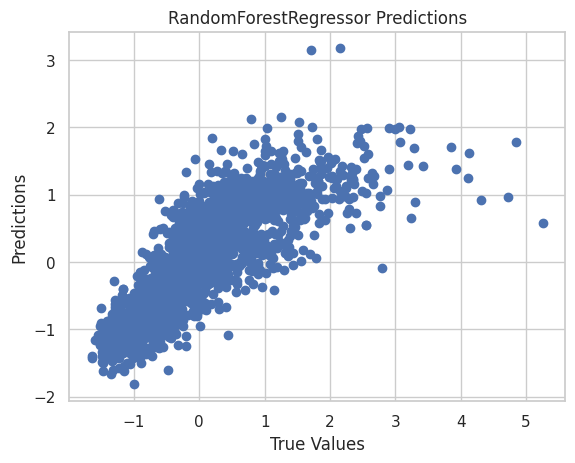

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
history = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
display1(y_test,y_pred)

MSE (Mean Squared Error): 0.39617920639325427
R² Score: 0.5854881815797479


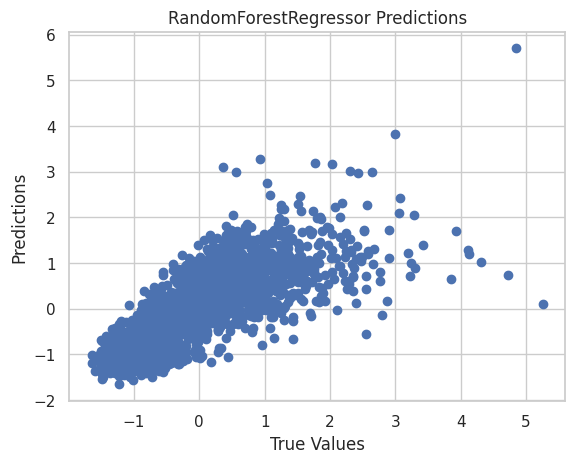

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
history = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
display1(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



MSE (Mean Squared Error): 0.3631205929052626
R² Score: 0.6200765339471301


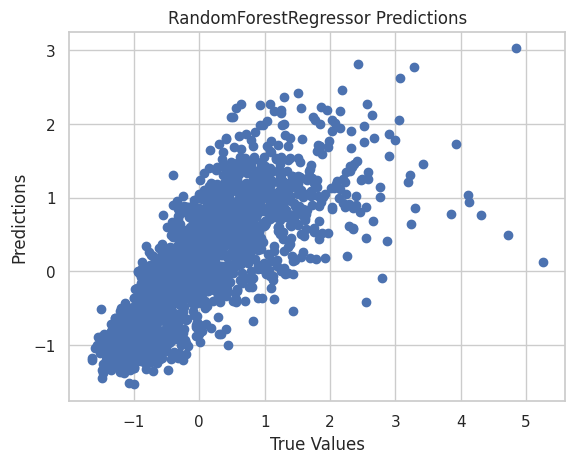

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=30)
history = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
display1(y_test,y_pred)